<center><b>EE 538 Spring 2021<br>
Low-Noise Analog Circuit Design<br>
University of Washington Electrical & Computer Engineering</b></center>


<b>Instructor: Jason Silver<br>
Assignment #4 (10 points)<br>
Due Sunday, May 2 (Submit on Canvas as a Jupyter Notebook)</b> 

*Please show your work*

<b>Problem 1: Common-source JFET amplifier

<img src="img/CS_JFET.png" width=300 />

<br>
<center><b>Figure 1. Common-source amplifier </center>

The drain current of an $n$-channel JFET can be described as a function of $V_{gs}$ by

\begin{equation}
I_d = \beta(V_{gs} - V_{th})^2
\end{equation}

where $\beta = I_{DSS}/V_{th}^2$ (unrelated to the current gain parameter for BJTs). $I_{DSS}$ represents the maximum drain current that is reached when $V_{gs} = 0$. Using this expression, the transconductance can be expressed as

\begin{equation}
g_m = 2\cdot\sqrt{\beta I_D}
\end{equation}


For the following, use $\beta = 24 mA/V^2$ and $V_{gs} - V_{th} = 0.29V$

<u>*Analysis*</u>

__a)__ Assuming $I_{D} = 2mA$, $I_G = 2pA$, and $R_D = 4k\Omega$, determine noise density values for $i_n$ and $e_n$ of the common-source amplifier in Figure 1, ignoring $1/f$ noise.

<img src="img/FET_noise_model.png" width=700 />

Given 


$\begin{eqnarray}
&& \gamma &=& \frac{2}{3} \\[0.5em]
&& g_m &=& 2\cdot\sqrt{\beta I_D} \\[0.5em]
&& &=& 2\cdot\sqrt{(24\cdot10^{-3}) \cdot (2\cdot10^{-3})} = 0.0139 \\[0.5em]
&& V_{gs} - V_{th} &=& V_{ov} = 0.29V \\[0.5em]
\end{eqnarray}$

<hr>

Current Noise Density

$\begin{eqnarray}
&& i_{n}^2 &=& i_{ng}^2 \\[0.5em]
&&  &=& 2qI_G  \\[0.5em]
&& i_{n} &=& \sqrt{ 2q \cdot 2 \cdot 10^{-12}} \\
&& &=& 0.8 \text{ fA}/\sqrt{Hz}  \\[0.5em]
\end{eqnarray}$

<br>
Voltage Noise Density

$\begin{eqnarray}
&& e_{n}^2 &=& \frac{i_{nd}^2 }{g_{m}^2} \\[0.5em]
&&  &=&  \frac{4kT \gamma g_{m}}{g_{m}^2} = \frac{4kT \gamma }{g_{m}} \\[0.75em]
&& e_{n} &=& \sqrt{\frac{4kT \gamma }{g_{m}}} \\[0.5em]
&& &=& \sqrt{\frac{4kT \cdot (2/3) }{0.0139}} \\[0.5em]
&& &=& 0.893 \text{ nV}/\sqrt{Hz}
\end{eqnarray}$

<hr>

__b)__ The $1/f$ drain current noise of a JFET can be expressed as

\begin{equation}
i_{nf}^2 = \dfrac{K_f\cdot I_D}{f}
\end{equation}

If $f_c$ is defined as the frequency at which the thermal and flicker noise densities are equal, determine $f_c$ if $K_f = 0.0021 fA$. 

$\begin{eqnarray}
& i_{nf}^2 & &=& n_{thermal}^2 \\[0.5em]
& \dfrac{K_f\cdot I_D}{f} & &=& 4kT \gamma g_{m} \\[0.5em]
& \frac{(0.0021 \cdot 10^{-15}) \cdot (2\cdot 10^{-3})}{f_c} & &=& 4kT \cdot (2/3) \cdot (0.0139) \\[0.5em]
& f_c & &=& 27.6 \text{Hz} \\[0.5em]
\end{eqnarray}$

<hr>

__c)__ Assuming $R_s$ = $100k\Omega$, what are the signal gain and noise figure of the amplifier at $100Hz$?

$\begin{eqnarray}
&& A_v &=& -g_m (r_0 \parallel R_D) \\[0.5em]
&&  &\approx& -g_m R_D \\[0.5em] 
&&  &\approx& -(0.0139) \cdot 4000 \\[0.5em] 
&& &\approx& 55.6 \text{ V/V} = 34.9 \text{ dB}
\end{eqnarray}$

$\begin{eqnarray}
&& NF &=& 1 + \frac{e_n^2 + i_n^2 R_S^2}{4kTR_S} \\[0.5em]
\end{eqnarray}$

In [3]:
R_s,R_D,I_D,I_G,beta,gamma = sp.symbols('R_s,R_D,I_D,I_G,beta,gamma')
k = 1.38e-23
T = 300
q = 1.602e-19
V_T = k*T/q

gm = 2 * sp.sqrt(beta * I_D)
in_sq = 2*q*I_G
en_sq = 4*k*T*gamma/gm
NF = 1 + (en_sq + in_sq*R_s**2)/(4*k*T*R_s)

components = {
    R_s : 100*1e3,
    R_D : 4000,
    I_D : 2*1e-3,
    I_G : 2*1e-12,
    beta : 24*1e-3,
    gamma : 2/3
}
H = sp.Matrix([NF])
H = H.subs(components)
print(f'Noise Figure is {round(float(H[0]),3)}')

Noise Figure is 1.0


<u>*Verification*</u>

<hr>

__d)__ Verify your answers to a-c in Ltspice using the SPICE model of the LSK389 JFET transistor from Linear Systems. Set the DC value of $V_s$ to $-0.1V$. 

What happens to the noise figure if the temperature rises to $150C$? (this part only needs to be verified in SPICE, no calculation)

<img src="img/HW04_Model.png" width=600 />

<img src="img/HW04_DC_Operating_Point.png" width=500 />

In [4]:
filepath = 'data/HW04_27C.txt'
filepath2 = 'data/HW04_150C.txt'
df = read_ltspice(filepath,'ac')
df2 = read_ltspice(filepath2,'ac')
freq = df['Freq.']
freq2 = df2['Freq.']
mag = df['Mag_V(vout)']
mag2 = df2['Mag_V(vout)']

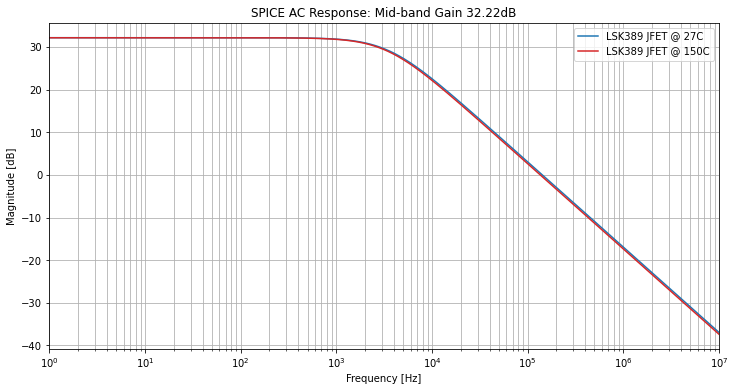

In [5]:
fig, ax = plt.subplots(1,figsize=(12,6))

ax.semilogx(freq, mag, color='tab:blue',label='LSK389 JFET @ 27C')
ax.semilogx(freq2, mag2, color='tab:red',label='LSK389 JFET @ 150C')
ax.grid(True,which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude [dB]')
ax.set_title(f'SPICE AC Response: Mid-band Gain {round(max(mag),2)}dB')
ax.set_xlim(1e0,1e7)

ax.legend()
plt.show();

In [6]:
filepath = 'data/HW04_noise_27C.txt'
filepath2 = 'data/HW04_noise_150C.txt'
df = pd.read_csv(filepath)
df2 = pd.read_csv(filepath2)
freq = df['frequency']
freq2 = df2['frequency']
onoise = df['V(onoise)']
onoise2 = df2['V(onoise)']
inoise = df['V(rs)']
inoise2 = df2['V(rs)']

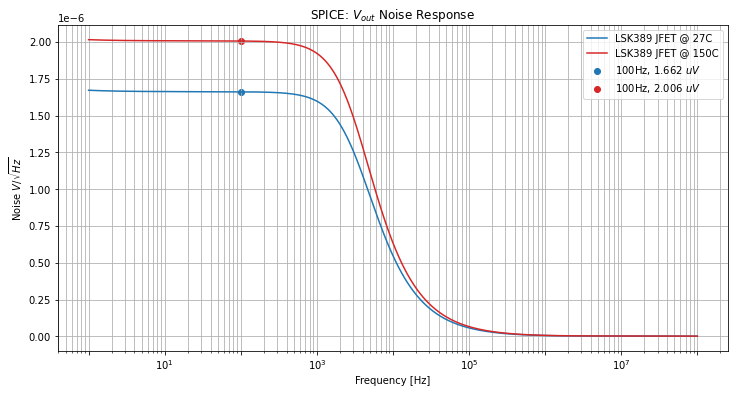

In [7]:
fig, ax = plt.subplots(1,figsize=(12,6))

x1 = np.where(freq<=100)[0][-1]
label1 = r"100Hz, {:.3f} $uV$".format(onoise[x1]*1e6)
x2 = np.where(freq2<=100)[0][-1]
label2 = r"100Hz, {:.3f} $uV$".format(onoise2[x2]*1e6)

ax.semilogx(freq, onoise, color='tab:blue',label='LSK389 JFET @ 27C')
ax.scatter(freq[x1],onoise[x1],label=label1,color='tab:blue')
ax.semilogx(freq2, onoise2, color='tab:red',label='LSK389 JFET @ 150C')
ax.scatter(freq2[x2],onoise2[x2],label=label2,color='tab:red')
ax.grid(True,which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Noise $V/\sqrt{Hz}$')
ax.set_title(r'SPICE: $V_{out}$ Noise Response')
ax.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
#ax.set_ylim(10e-9,50e-9)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.legend()
plt.show();

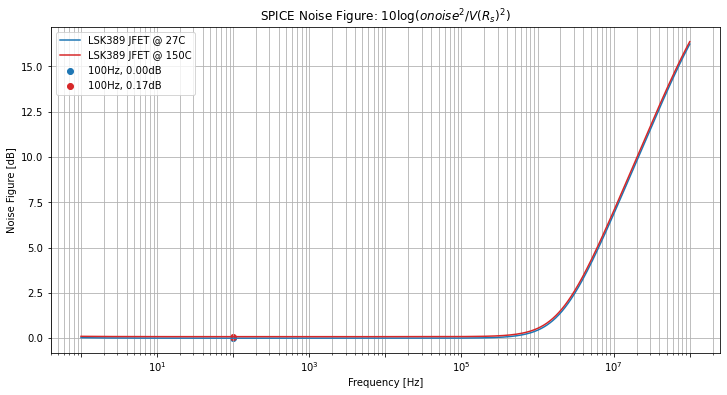

In [8]:
fig, ax = plt.subplots(1,figsize=(12,6))

x1 = np.where(freq<=100)[0][-1]
label1 = r"100Hz, {:.2f}dB".format(10*np.log10(onoise[x1]**2/inoise[x1]**2))
x2 = np.where(freq<=100)[0][-1]
label2 = r"100Hz, {:.2f}dB".format(10*np.log10(onoise2[x2]**2/inoise2[x2]**2))

ax.semilogx(freq, 10*np.log10(onoise/inoise), color='tab:blue',label='LSK389 JFET @ 27C')
ax.scatter(freq[x1],10*np.log10(onoise[x1]/inoise[x1]),label=label1,color='tab:blue')
ax.semilogx(freq2, 10*np.log10(onoise2/inoise2), color='tab:red',label='LSK389 JFET @ 150C')
ax.scatter(freq[x2],10*np.log10(onoise2[x2]/inoise2[x2]),label=label2,color='tab:red')
ax.grid(True,which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Noise Figure [dB]')
ax.set_title(r'SPICE Noise Figure: $10 \log(onoise^2/V(R_s)^2)$')

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.legend()
plt.show();

<img src="img/opamp_in_meas.png" width=400 />

 - The noise properties of an amplifier can be determined by two measurements: 1) with the input shorted to AC ground for $e_n$, and 2) with an resistor between the input and ground for $i_n$
 
 - To measure $i_n$, the resistance $R_m$ should be selected such that $i_nR_m >> e_n$. In this case, $i_n$ can be calculated as
 
\begin{equation}
i_n = \dfrac{e_{out} - 4kTR_m}{R_m}
\end{equation}

In [9]:
filepath = 'data/HW04_en.txt'
df = pd.read_csv(filepath)
freq = df['frequency']
e_n = df['V(onoise)/gain']

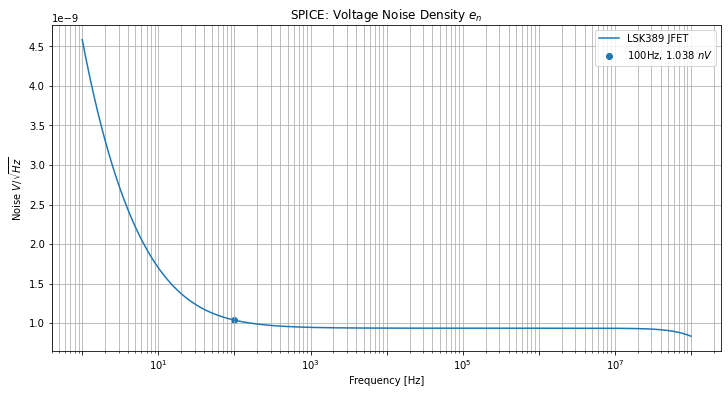

In [10]:
fig, ax = plt.subplots(1,figsize=(12,6))

x1 = np.where(freq<=100)[0][-1]
label1 = r"100Hz, {:.3f} $nV$".format(e_n[x1]*1e9)

ax.semilogx(freq, e_n, color='tab:blue',label='LSK389 JFET')
ax.scatter(freq[x1],e_n[x1],label=label1,color='tab:blue')
ax.grid(True,which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Noise $V/\sqrt{Hz}$')
ax.set_title(r'SPICE: Voltage Noise Density $e_n$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(-9,-9))
#ax.set_ylim(10e-9,50e-9)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.legend()
plt.show();

In [11]:
filepath = 'data/HW04_in.txt'
df = pd.read_csv(filepath)
freq = df['frequency']
i_n = df['(V(onoise)-4*4.11*1e(U+2212)21*1e6)/(1e6)']

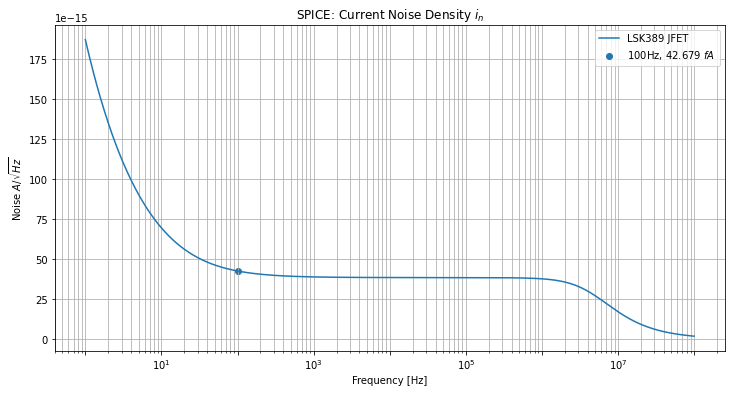

In [12]:
fig, ax = plt.subplots(1,figsize=(12,6))

x1 = np.where(freq<=100)[0][-1]
label1 = r"100Hz, {:.3f} $fA$".format(i_n[x1]*1e15)

ax.semilogx(freq, i_n, color='tab:blue',label='LSK389 JFET')
ax.scatter(freq[x1],i_n[x1],label=label1,color='tab:blue')
ax.grid(True,which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'Noise $A/\sqrt{Hz}$')
ax.set_title(r'SPICE: Current Noise Density $i_n$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(-15,-15))
#ax.set_ylim(10e-9,50e-9)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.legend()
plt.show();

### Reference Page

In [13]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

In [14]:
def read_ltspice(file_name,ftype='trans',units='db'):
    cols = []
    arrs = []
    with open(file_name, 'r',encoding='utf-8') as data:
        for i,line in enumerate(data):
            if i==0:
                cols = line.split()
                arrs = [[] for _ in cols]
                continue
            parts = line.split()
            for j,part in enumerate(parts):
                arrs[j].append(part)
    df = pd.DataFrame(arrs,dtype='float64')
    df = df.T
    df.columns = cols
    if ftype=='trans':
        return df
    elif ftype=='ac':
        if units=='db':
            for col in cols:
                if df[col].str.contains(',').all():
                    df[f'Mag_{col}'] = df[col].apply(lambda x: x.split(',')[0])
                    df[f'Mag_{col}'] = df[f'Mag_{col}'].apply(lambda x: x[1:-2])
                    df[f'Mag_{col}'] = df[f'Mag_{col}'].astype('float64')
                    df[f'Phase_{col}'] = df[col].apply(lambda x: x.split(',')[1])
                    df[f'Phase_{col}'] = df[f'Phase_{col}'].apply(lambda x: x[0:-2])
                    df[f'Phase_{col}'] = df[f'Phase_{col}'].astype('float64')
        if units=='cartesian':
            for col in cols:
                if df[col].str.contains(',').all():
                    df[f'Re_{col}'] = df[col].apply(lambda x: x.split(',')[0])
                    df[f'Re_{col}'] = df[f'Re_{col}'].astype('float64')
                    df[f'Im_{col}'] = df[col].apply(lambda x: x.split(',')[1])
                    df[f'Im_{col}'] = df[f'Im_{col}'].astype('float64')
        df['Freq.'] = df['Freq.'].astype('float64')
        return df
    else:
        print('invalid ftype')